# Situación problema Parte 2

### Players FIFA 21

La base de datos a utilizar contiene los atributos de los 100 jugadores de futbol con mayor calificación en las cartas de modo carrera del videojuego FIFA 21

A través de su análisis y aplicación de elementos gráficos, se responderán 5 preguntas/hipótesis planteadas

https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

### Limpieza de la base de datos

In [1]:
#pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('modocarrera_fifa21.csv')

In [4]:
df = df.drop(['sofifa_id', 'player_url','long_name','dob','lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], axis=1)
df = df.drop(['league_rank','wage_eur','player_positions','ls', 'st', 'rs','lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 
              'preferred_foot','international_reputation', 'weak_foot', 'skill_moves', 'work_rate','cm','rcm', 'rm','body_type', 'real_face', 
              'release_clause_eur', 'player_tags', 'team_position', 'team_jersey_number', 'loaned_from','joined','contract_valid_until', 
              'nation_position', 'nation_jersey_number','gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning', 
              'player_traits', 'attacking_crossing','attacking_finishing', 'attacking_heading_accuracy','attacking_short_passing', 'attacking_volleys', 
              'skill_dribbling','skill_curve', 'skill_fk_accuracy', 'skill_long_passing','skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
              'movement_agility', 'movement_reactions', 'movement_balance','power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
              'power_long_shots', 'mentality_aggression', 'mentality_interceptions','mentality_positioning', 'mentality_vision', 'mentality_penalties',
              'mentality_composure', 'defending_marking', 'defending_standing_tackle','defending_sliding_tackle', 'goalkeeping_diving','goalkeeping_handling', 
              'goalkeeping_kicking','goalkeeping_positioning', 'goalkeeping_reflexes','height_cm','weight_kg','club_name','potential','pace','passing',
              'dribbling','physic'], axis=1)
df.head()

,short_name,age,nationality,league_name,overall,value_eur,shooting,defending
0,L. Messi,33,Argentina,Spain Primera Division,93,67500000,92.0,38.0
1,Cristiano Ronaldo,35,Portugal,Italian Serie A,92,46000000,93.0,35.0
2,J. Oblak,27,Slovenia,Spain Primera Division,91,75000000,NaN,NaN
3,R. Lewandowski,31,Poland,German 1. Bundesliga,91,80000000,91.0,43.0
4,Neymar Jr,28,Brazil,French Ligue 1,91,90000000,85.0,36.0


In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 99
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   short_name   85 non-null     object 
 1   age          85 non-null     int64  
 2   nationality  85 non-null     object 
 3   league_name  85 non-null     object 
 4   overall      85 non-null     int64  
 5   value_eur    85 non-null     int64  
 6   shooting     85 non-null     float64
 7   defending    85 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.0+ KB


### Medidas de tendencia central y de dispersión

In [7]:
df.describe()

,age,overall,value_eur,shooting,defending
count,85.000000,85.000000,8.500000e+01,85.000000,85.000000
mean,28.223529,86.623529,4.731176e+07,73.447059,62.494118
std,3.765054,1.933271,1.749574e+07,13.930530,20.356714
min,19.000000,84.000000,1.150000e+07,28.000000,32.000000
25%,26.000000,85.000000,3.700000e+07,65.000000,43.000000
50%,28.000000,86.000000,4.600000e+07,78.000000,64.000000
75%,31.000000,87.000000,5.450000e+07,85.000000,82.000000
max,35.000000,93.000000,1.055000e+08,93.000000,91.000000


In [8]:
#pip install sklearn

In [9]:
#ip install statsmodels

### Descripción de las variables de interés

Las variables de interés son short_name, age, overall, league_name, nationality, shooting, defending y value_eur
* short_name es una variable categórica que describe el nombre de cada jugador
* age es una variable numérica discreta que explica la edad en años del jugador
* nationality es una variable categórica que describe la nacionalidad del jugador
* league_name es una variable categórica que describe la liga en la que se juega
* overall es una variable numérica discreta que explica la puntuación general del jugador en una escala del 1-100
* value_eur es una variable numérica discreta que explica el valor del jugador en euros
* shooting es una variable numérica discreta que califica el tiro del jugador en una escala del 1-100
* defending es una variable numérica discreta que califica las habilidades defensivas del jugador en una escala del 1-100

### Pregunta de investigación 1

#### ¿Cómo se dividen los mejores 85 jugadores en las ligas profesionales?

In [10]:
ligas = df['league_name'].value_counts()
ligas = ligas.to_frame()
ligas['%'] = (ligas.loc[:,'league_name']/ligas.loc[:,'league_name'].sum(axis = 0))*100
ligas

,league_name,%
English Premier League,32,37.647059
Spain Primera Division,20,23.529412
Italian Serie A,17,20.000000
German 1. Bundesliga,9,10.588235
French Ligue 1,7,8.235294


In [11]:
ligas = ligas.reset_index()
ligas = ligas.rename({'index':'Ligas'},
                       axis = 1
                    )
ligas

,Ligas,league_name,%
0,English Premier League,32,37.647059
1,Spain Primera Division,20,23.529412
2,Italian Serie A,17,20.000000
3,German 1. Bundesliga,9,10.588235
4,French Ligue 1,7,8.235294


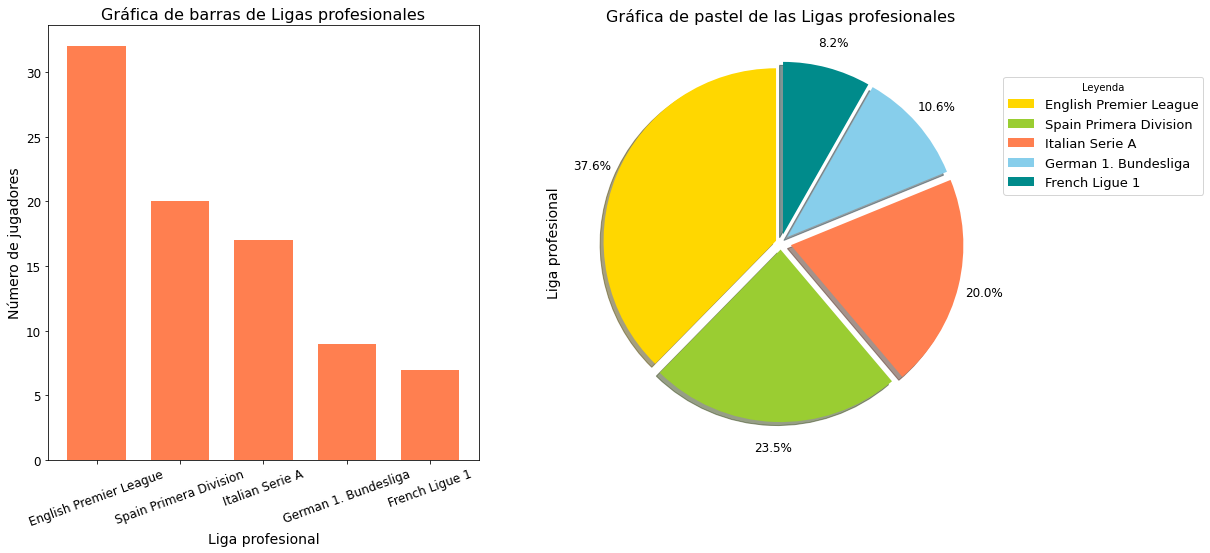

In [12]:
plt.subplot(1,2,1)
x = list(ligas['Ligas'])
y = list(ligas['league_name'])

plt.bar(x,y,width=0.7,color='coral')
plt.title('Gráfica de barras de Ligas profesionales',fontsize=16)
plt.xticks(fontsize=12, rotation=20)
plt.xlabel('Liga profesional',fontsize=14)
plt.ylabel('Número de jugadores',fontsize=14)
plt.yticks(fontsize=12)

plt.subplot(1,2,2)
color_list = ['gold','yellowgreen','coral','skyblue','darkcyan']
explode_list = [0.03,0.04,0.06,0.05,0.05]

ligas['league_name'].plot(kind = 'pie',
                   figsize = (17,8),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.15,
                   colors = color_list,
                   explode = explode_list,
                   shadow = True,
                   fontsize=12
                         )

plt.legend(labels = ligas.Ligas,
           bbox_to_anchor = (1.0,0.9),
           title = 'Leyenda',
           fontsize=13
          )
plt.title('Gráfica de pastel de las Ligas profesionales', fontsize=16)
plt.ylabel('Liga profesional',fontsize=14)
plt.show()

#### Conclusión
De los 85 mejores jugadores profesionales, la mayoría se encuentra en la liga inglesa y la minoría en la liga francesa.

### Pregunta de investigación 2

#### ¿Cómo se correlaciona el valor de un jugador con sus habilidades y edad?

In [13]:
import statsmodels.api as sm
from sklearn import linear_model

In [14]:
modelA = sm.OLS.from_formula('value_eur~age + overall + shooting + defending', data = df)
resultA = modelA.fit()
resultA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              value_eur   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     176.9
Date:                Fri, 03 Dec 2021   Prob (F-statistic):           6.97e-39
Time:                        03:08:06   Log-Likelihood:                -1440.5
No. Observations:                  85   AIC:                             2891.
Df Residuals:                      80   BIC:                             2903.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.504e+08   2.92e+07    -15.435      0.000   -5.09e+08   -3.92e+08
age        -3.195e+06   1.71e+05    -18.670      0.000   -3.54e+06   -2.85e+06
overall     6.786e+06   3.49e+05     19.467      0.000    6.09e+06    7.48e+06
shooting    6.724e+04   7.86e+04      0.855      0.395   -8.92e+04    2.24e+05
defending  -7.748e+04   5.26e+04     -1.472      0.145   -1.82e+05    2.73e+04
==============================================================================
Omnibus:                       26.023   Durbin-Watson:                   1.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.699
Skew:                          -1.226   Prob(JB):                     3.24e-10
Kurtosis:                       5.516   Cond. No.                     6.25e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.25e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Caso 1: Lewandowski
* Edad = 31
* Overall = 91
* Shooting = 91
* Defending = 43

In [15]:
print('Valor en euros de una persona con 31 años, un overall de 91, tiro de 91 y defensa de 43:',-4.504e+08 - 3.195e+06*31 + 6.786e+06*91 + 6.724e+04*91 - 7.748e+04*43)
df.loc[df['short_name']=='R. Lewandowski', :]

Valor en euros de una persona con 31 años, un overall de 91, tiro de 91 y defensa de 43: 70868200.0


,short_name,age,nationality,league_name,overall,value_eur,shooting,defending
3,R. Lewandowski,31,Poland,German 1. Bundesliga,91,80000000,91.0,43.0


In [16]:
print('La diferencia es de \t:', 80000000-70868200)

La diferencia es de 	: 9131800


#### Conclusiones
* Variable dependiente: value_eur
* Variable independiente: age, overall, shooting, defending
* R-squared: 0.898 por lo tanto, este modelo es eficiente, ya que explica casi el 90% de value_eur basado en age, overall, shooting y defending
* Df model: 4
* Intercept, age, overall < 0.05 si son estadisiticamente significativos
* shooting, defending > 0.05 no son estadisiticamente significativos


value_eur = - 4.504e+08 - 3.195e+06*age + 6.786e+06*overall + 6.724e+04*shooting - 7.748e+04*defending

### Pregunta de investigación 3

#### ¿Cómo es la distribución de sus residuales?

In [17]:
RESIA = resultA.resid
RESIA

0    -1.096773e+07
1    -1.959165e+07
3     9.169210e+06
4     9.445733e+06
5     1.174272e+07
          ...     
95   -3.119540e+05
96    1.933365e+06
97    1.327403e+06
98    1.415115e+06
99   -1.639807e+07
Length: 85, dtype: float64

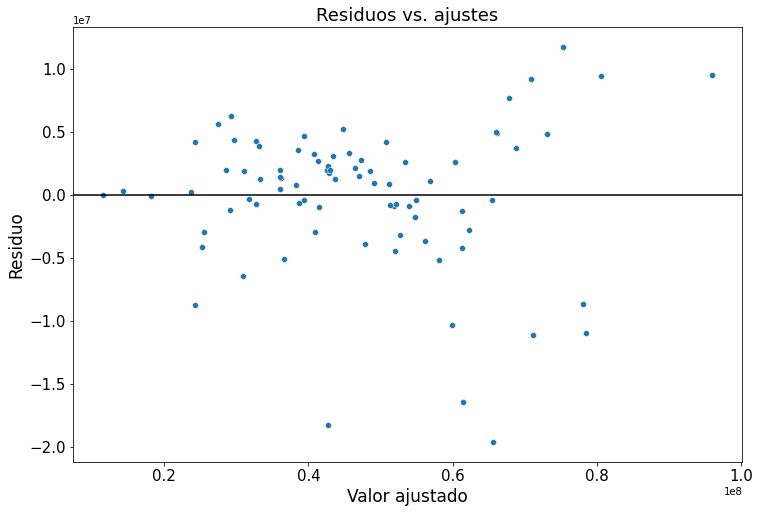

In [18]:
plt.figure(figsize = (12,8))
resi_plot = sns.scatterplot(x = resultA.fittedvalues,
                            y = RESIA)


plt.title('Residuos vs. ajustes', fontsize=18)
plt.xlabel('Valor ajustado',fontsize=17)
plt.xticks(fontsize=15)
plt.ylabel('Residuo',fontsize=17)
plt.yticks(fontsize=15)
plt.axhline(0, c='black')

#### Conclusión
Los residuos están distribuidos aleatoriamente, ya que están ubicados sin orden aparente en ambos lados del 0 y con patrones no detectables.

Sin embargo, podemos observar que hay algunos valores atípicos que están alejados del 0.

### Limitaciones

* En la base de datos original existen algunos valores nulos dependiendo de la columna, debido a que a los porteros se les califica con distintos atributos
* Los datos no están actualizados a la temporada actual, sino a la 20/21, por lo que las ligas y equipos de algunos jugadores pertenecen a las pasadas
* En la base original existen muchos atributos que no aportan gran valor al análisis, como las ligas URL o los nombre completos de los jugadores